# nature論文再現　ネットワーク頑健性

対応する動画：[【研究で使うPython】#23 Nature論文再現！ネットワークの頑健性②](https://youtu.be/HXgh6OivhX8)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## 直径の変化

E average degree 3.864
SF average degree 3.984


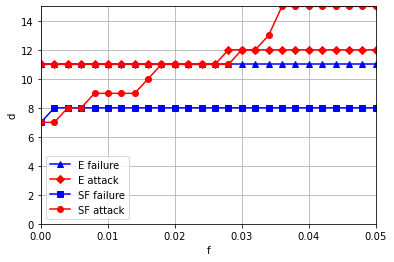

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

N = 500 # ノードの数
k = 4 # 平均次数
E = N*k/2 # エッジの数

x = [[], [], [], []]
y = [[], [], [], []]

# attack：次数が一番大きいノードを削除
def remove_node_by_attack(G):
    mx_n = -1
    mx_d = -1
    
    # 最大次数ノードが複数あった時のためシャッフル
    ns = list(G.nodes())
    np.random.shuffle(ns)
    
    for n in ns:
        d = len(list(G.neighbors(n)))
        if d > mx_d:
            mx_n = n
            mx_d = d
            
    G.remove_node(mx_n)

# failure：次数に関係なくランダムに削除
def remove_node_by_error(G):
    G.remove_node(np.random.choice(G.nodes()))

# 最大クラスタを返す
def max_cluster(G):
    largest_cc = max(nx.connected_components(G), key=len)
    max_cluster = G.subgraph(largest_cc).copy()
   
    return max_cluster

# 最大クラスターのノード数を取得
def get_SMC(G):
    mc = max_cluster(G)
    return len(mc)

G1=nx.erdos_renyi_graph(N,k/(N-1))# ER
G2=nx.Graph.copy(G1)# ER
G3=nx.barabasi_albert_graph(N,int(k/2))# SF
G4=nx.Graph.copy(G3)# SF

print('E average degree', nx.number_of_edges(G1)*2/N)
print('SF average degree', nx.number_of_edges(G3)*2/N)
           
del_num=0
while del_num/N<=0.05:
    mc_failure = max_cluster(G1)
    y[0].append(nx.diameter(mc_failure))
    x[0].append(del_num/N)
    remove_node_by_error(G1)
    
    mc_attack = max_cluster(G2)
    y[1].append(nx.diameter(mc_attack))
    x[1].append(del_num/N)
    remove_node_by_attack(G2)

    del_num+=1
        

del_num=0
while del_num/N<=0.05:
    mc_failure = max_cluster(G3)
    y[2].append(nx.diameter(mc_failure))
    x[2].append(del_num/N)
    remove_node_by_error(G3)

    mc_attack = max_cluster(G4)
    y[3].append(nx.diameter(mc_attack))
    x[3].append(del_num/N)
    remove_node_by_attack(G4)

    del_num+=1

plt.figure()
plt.xlabel('f') #x軸の名前
plt.ylabel('d') #y軸の名前
plt.ylim(0,15)
plt.xlim(0,0.05)
plt.plot(x[0],y[0],label="E failure",marker='^',c='b')
plt.plot(x[1],y[1],label="E attack",marker='D',c='r')
plt.plot(x[2],y[2],label="SF failure",marker='s',c='b')
plt.plot(x[3],y[3],label="SF attack",marker='o',c='r')

plt.grid()
plt.legend()

## 最大クラスタサイズの変化

E average degree 4.076
SF average degree 3.992


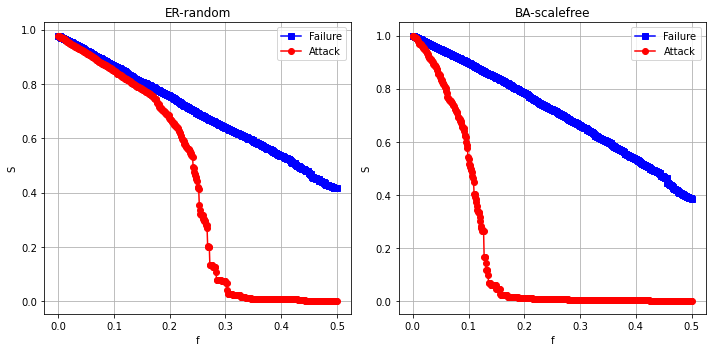

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

N = 1000 # ノードの数
k = 4 # 平均次数
E = N*k/2 # エッジの数

x = [[], [], [], []]
y = [[], [], [], []]

# attack：次数が一番大きいノードを削除
def remove_node_by_attack(G):
    mx_n = -1
    mx_d = -1
    
    # 最大次数ノードが複数あった時のためシャッフル
    ns = list(G.nodes())
    np.random.shuffle(ns)
    
    for n in ns:
        d = len(list(G.neighbors(n)))
        if d > mx_d:
            mx_n = n
            mx_d = d
            
    G.remove_node(mx_n)

# failure：次数に関係なくランダムに削除
def remove_node_by_error(G):
    G.remove_node(np.random.choice(G.nodes()))

# 最大クラスタを返す
def max_cluster(G):
    largest_cc = max(nx.connected_components(G), key=len)
    max_cluster = G.subgraph(largest_cc).copy()
   
    return max_cluster

# 最大クラスターのノード数を取得
def get_SMC(G):
    mc = max_cluster(G)
    return len(mc)

G1=nx.erdos_renyi_graph(N,k/(N-1)) # ER
G2=nx.Graph.copy(G1)
G3=nx.barabasi_albert_graph(N,int(k/2)) # SF
G4=nx.Graph.copy(G3)

print('E average degree', nx.number_of_edges(G1)*2/N)
print('SF average degree', nx.number_of_edges(G3)*2/N)
           
del_num=0
while del_num/N <= 0.5:
    y[0].append(get_SMC(G1)/N)
    x[0].append(del_num/N)
    remove_node_by_error(G1)
    
    y[1].append(get_SMC(G2)/N)
    x[1].append(del_num/N)
    remove_node_by_attack(G2)

    del_num+=1


del_num=0
while del_num/N <= 0.5:
    y[2].append(get_SMC(G3)/N)
    x[2].append(del_num/N)
    remove_node_by_error(G3)

    y[3].append(get_SMC(G4)/N)
    x[3].append(del_num/N)
    remove_node_by_attack(G4)

    del_num+=1

        
fig=plt.figure(figsize=(10, 5))
    
ax1 = fig.add_subplot(1, 2, 1)   # 1行2列の1列目
ax1.plot(x[0], y[0], label="Failure",marker='s',c='b')
ax1.plot(x[1] ,y[1] , label="Attack",marker='o',c='r') 
ax1.set_title("ER-random")
ax1.set_xlabel('f') # x軸の名前
ax1.set_ylabel('S') # y軸の名前
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)   # 1行2列の2列目
ax2.plot(x[2], y[2] , label="Failure",marker='s',c='b')
ax2.plot(x[3], y[3], label="Attack",marker='o',c='r')
ax2.set_title("BA-scalefree")
ax2.set_xlabel('f') # x軸の名前
ax2.set_ylabel('S') # y軸の名前
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()